In [1]:
## import some modules between which also our HamFit_py

import HamF_py as hamf
from iminuit import Minuit
import numpy as np
import pyhf
import matplotlib.pyplot as plt
import modifier

/tmp/mcolonna/lb-conda/envs/env_test/etc/cling/std.modulemap:257:29: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "memory_resource" [optional] {
                            ^
/tmp/mcolonna/lb-conda/envs/env_test/etc/cling/std.modulemap:447:27: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/chrono.h" [optional] {
                          ^
/tmp/mcolonna/lb-conda/envs/env_test/etc/cling/std.modulemap:531:41: warning: unknown attribute 'optional' [-Wignored-attributes]
  explicit module "bits_ranges_base_h" [optional] {
                                        ^
/tmp/mcolonna/lb-conda/envs/env_test/etc/cling/std.modulemap:538:32: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/ranges_util.h" [optional] {
                               ^
/tmp/mcolonna/lb-conda/envs/env_test/etc/cling/std.modulemap:559:40: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/uses_allocator_args.h" [optio

Welcome to JupyROOT 6.28/04


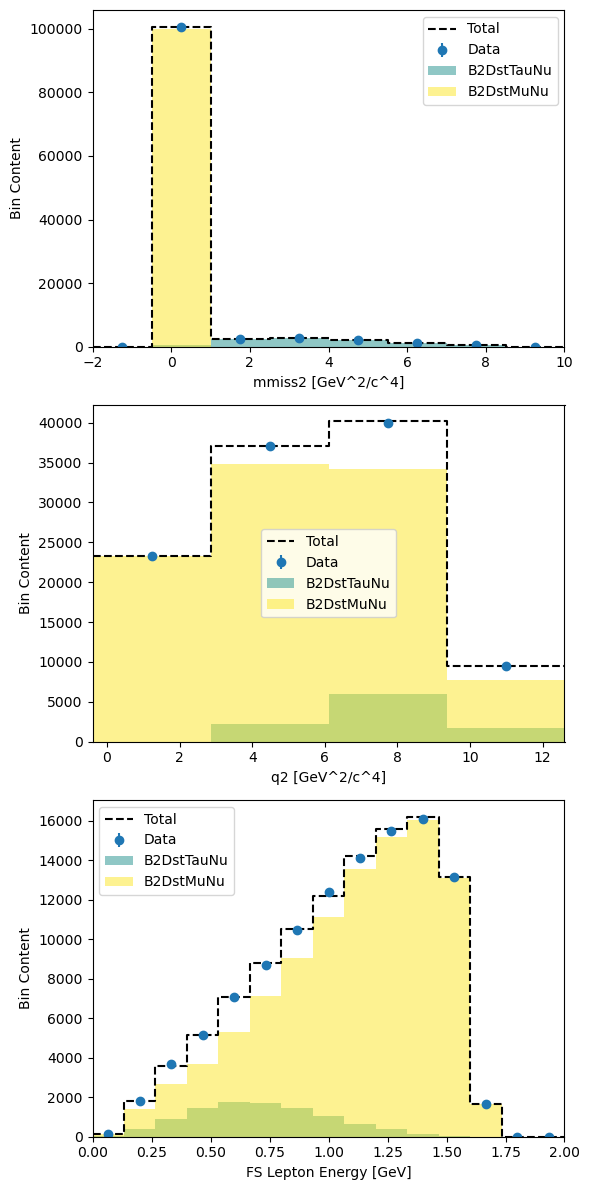

In [2]:
# create the fitter 
# not yet optimized for the pyhf interface
# all the information necessary is stored in a fitter even if it is not (yet) trivial to retrieve

reader = hamf.Reader("B02DstTauNu_TauMu.config")
fitter = reader.createFitter()

params = {"SM" : 1., "Re_S_qLlL" : -0., "Im_S_qLlL" : 0. , "Re_S_qRlL" : 0., "Im_S_qRlL" : 0.,  "Re_V_qLlL" : 0., "Im_V_qLlL" : 0. , "Re_V_qRlL" : 0., "Im_V_qRlL" : 0., "Re_T_qLlL" : 0.0, "Im_T_qLlL" : +0., "delta_RhoSq_uncorrelated[0]" : 0.0, "delta_cSt_uncorrelated[0]" : 0.0, "delta_chi21_uncorrelated[0]" : 0., "delta_chi2p_uncorrelated[0]" : 0., "delta_chi3p_uncorrelated[0]" : 0., "delta_eta1_uncorrelated[0]" : 0., "delta_etap_uncorrelated[0]" : 0., "delta_phi1p_uncorrelated[0]" : 0., "delta_beta21_uncorrelated[0]" : 0., "delta_beta3p_uncorrelated[0]" : 0.,"lumi" : 1.}
fitter.plot(**params)

In [3]:
# Definition of the nominal and the alternative models for the pyhf test

def SM_dist_sgnl():
    params_SM = {"SM" : 1., "Re_S_qLlL" : -0., "Im_S_qLlL" : 0. , "Re_S_qRlL" : 0., "Im_S_qRlL" : 0.,  "Re_V_qLlL" : 0., "Im_V_qLlL" : 0. , "Re_V_qRlL" : 0., "Im_V_qRlL" : 0., "Re_T_qLlL" : 0.0, "Im_T_qLlL" : +0., "delta_RhoSq" : 0.0, "delta_cSt" : 0.0, "delta_chi21" : 0., "delta_chi2p" : 0., "delta_chi3p" : 0., "delta_eta1" : 0., "delta_etap" : 0., "delta_phi1p" : 0., "delta_beta21" : 0., "delta_beta3p" : 0.,"lumi" : 1.}
    res = fitter._template_list[0].generate_template(**params_SM) + fitter._template_list[1].generate_template(**params_SM)
    return res
def NP_dist_sgnl(**kwargs):
    params_NP = {"SM" : kwargs["SM"], "Re_S_qLlL" : kwargs["Re_S_qLlL"], "Im_S_qLlL" : kwargs["Im_S_qLlL"], "Re_S_qRlL" : kwargs["Re_S_qRlL"], "Im_S_qRlL" : kwargs["Im_S_qRlL"],  "Re_V_qLlL" : kwargs["Re_V_qLlL"], "Im_V_qLlL" : kwargs["Im_V_qLlL"], "Re_V_qRlL" : kwargs["Re_V_qRlL"], "Im_V_qRlL" : kwargs["Im_V_qRlL"], "Re_T_qLlL" : kwargs["Re_T_qLlL"], "Im_T_qLlL" : kwargs["Im_T_qLlL"],"delta_RhoSq" : kwargs["FFs_decorrelated[0]"], "delta_cSt" : kwargs["FFs_decorrelated[1]"], "delta_chi21" : kwargs["FFs_decorrelated[2]"], "delta_chi2p" : kwargs["FFs_decorrelated[3]"], "delta_chi3p" : kwargs["FFs_decorrelated[4]"], "delta_eta1" : kwargs["FFs_decorrelated[5]"], "delta_etap" : kwargs["FFs_decorrelated[6]"], "delta_phi1p" : kwargs["FFs_decorrelated[7]"], "delta_beta21" : kwargs["FFs_decorrelated[8]"], "delta_beta3p" : kwargs["FFs_decorrelated[9]"],"lumi" : 1.}
    res = fitter._template_list[0].generate_template(**params_NP) + fitter._template_list[1].generate_template(**params_NP)
    return res

In [4]:
# Definition of the custom modifiers as the Wilson coefficients and the eigenvectors of the FFs

new_params = {
                'SM'   :{'inits': (1.,), 'bounds': ((0., 10.),), 'paramset_type': 'unconstrained'},
                'Re_S_qLlL'   :{'inits': (0.,), 'bounds': ((-1.,1.),), 'paramset_type': 'unconstrained'},
                'Im_S_qLlL'   :{'inits': (0.,), 'bounds': ((-2.,2.),), 'paramset_type': 'unconstrained'},
                'Re_S_qRlL'   :{'inits': (0.,), 'bounds': ((-1.,1.),), 'paramset_type': 'unconstrained'},
                'Im_S_qRlL'   :{'inits': (0.,), 'bounds': ((-2.,2.),), 'paramset_type': 'unconstrained'},
                'Re_V_qLlL'   :{'inits': (0.,), 'bounds': ((-0.3,0.3),), 'paramset_type': 'unconstrained'},
                'Im_V_qLlL'   :{'inits': (0.,), 'bounds': ((-1.,1.),), 'paramset_type': 'unconstrained'},
                'Re_V_qRlL'   :{'inits': (0.,), 'bounds': ((-0.3,0.3),), 'paramset_type': 'unconstrained'},
                'Im_V_qRlL'   :{'inits': (0.,), 'bounds': ((-1.,1.),), 'paramset_type': 'unconstrained'},
                'Re_T_qLlL'   :{'inits': (0.,), 'bounds': ((-0.1,0.1),), 'paramset_type': 'unconstrained'},
                'Im_T_qLlL'   :{'inits': (0.,), 'bounds': ((-0.2,0.2),), 'paramset_type': 'unconstrained'},
                #'delta_RhoSq'   :{'inits': (0.,), 'bounds': (), 'cov': [1], 'paramset_type': 'constrained_by_normal'},
                #'delta_cSt'   :{'inits': (0.,), 'bounds': (), 'cov': [1], 'paramset_type': 'constrained_by_normal'},
                #'delta_chi21'   :{'inits': (0.,), 'bounds': (), 'cov': [1], 'paramset_type': 'constrained_by_normal'},
                #'delta_chi2p'   :{'inits': (0.,), 'bounds': (), 'cov': [1], 'paramset_type': 'constrained_by_normal'},
                #'delta_chi3p'   :{'inits': (0.,), 'bounds': (), 'cov': [1], 'paramset_type': 'constrained_by_normal'},
                #'delta_eta1'   :{'inits': (0.,), 'bounds': (), 'cov': [1], 'paramset_type': 'constrained_by_normal'},
                #'delta_etap'   :{'inits': (0.,), 'bounds': (), 'cov': [1], 'paramset_type': 'constrained_by_normal'},
                #'delta_phi1p'   :{'inits': (0.,), 'bounds': (), 'cov': [1], 'paramset_type': 'constrained_by_normal'},
                #'delta_beta21'   :{'inits': (0.,), 'bounds': (), 'cov': [1], 'paramset_type': 'constrained_by_normal'},
                #'delta_beta3p'   :{'inits': (0.,), 'bounds': (), 'cov': [1], 'paramset_type': 'constrained_by_normal'},
                'FFs'         :{'inits': (0.,0.,0.,0.,0.,0.,0.,0.,0.,0.), 
                                'bounds': (),
                                'cov': [[0.1, 0.3, 0., 0., 0., 0., 0., 0., 0., 0.],
                                        [0.3, 1., 0., 0., 0., 0., 0., 0., 0., 0.],
                                        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
                                        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
                                        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
                                        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
                                        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
                                        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
                                        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
                                        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
                                'paramset_type': 'unconstrained'
                               }
            }

cmod_sgnl = modifier.Modifier(new_params, NP_dist_sgnl, SM_dist_sgnl)
#cmod_norm = modifier.Modifier(new_params, NP_dist_norm, SM_dist_norm)

In [5]:
# we than build a pyhf model

data_init_sgnl = SM_dist_sgnl()
#data_init_norm = SM_dist_norm()

spec = {
  "channels": [
    {
      "name": "doublechannel",
      "samples": [
        {
          "name": "signal",
          "data": data_init_sgnl,
          "modifiers": [
            {
                "name": "mu",
                "type": "normfactor",
                "data": None
            }
          ]
        }
      ]
    } 
  ]
}


model = pyhf.Model(spec)
custom_mod = {
                "name": "custom_modifier",
                "type": "custom",
                "data":
                    {
                        "expr": "custom_weight_fn",
                    }
              }

model = modifier.add_to_model(model, ['doublechannel'], ['signal'], cmod_sgnl.expanded_pyhf, custom_mod)
#model = modifier.add_to_model(model, ['doublechannel'], ['normalization'], cmod_norm.expanded_pyhf, custom_mod)
model.spec

{'channels': [{'name': 'doublechannel',
   'samples': [{'name': 'signal',
     'data': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [6]:
# print the parameters

model.main_model.modifiers_appliers['custom'].param_viewer.allpar_viewer.names

('SM',
 'Re_S_qLlL',
 'Im_S_qLlL',
 'Re_S_qRlL',
 'Im_S_qRlL',
 'Re_V_qLlL',
 'Im_V_qLlL',
 'Re_V_qRlL',
 'Im_V_qRlL',
 'Re_T_qLlL',
 'Im_T_qLlL',
 'FFs_decorrelated[0]',
 'FFs_decorrelated[1]',
 'FFs_decorrelated[2]',
 'FFs_decorrelated[3]',
 'FFs_decorrelated[4]',
 'FFs_decorrelated[5]',
 'FFs_decorrelated[6]',
 'FFs_decorrelated[7]',
 'FFs_decorrelated[8]',
 'FFs_decorrelated[9]',
 'mu')

In [7]:
# print the parameters' map

model.config.par_map

{'SM': {'slice': slice(0, 1, None),
  'paramset': <pyhf.parameters.paramsets.unconstrained at 0x7fcfe17f16f0>},
 'Re_S_qLlL': {'slice': slice(1, 2, None),
  'paramset': <pyhf.parameters.paramsets.unconstrained at 0x7fcfe17f1720>},
 'Im_S_qLlL': {'slice': slice(2, 3, None),
  'paramset': <pyhf.parameters.paramsets.unconstrained at 0x7fcfe17f1750>},
 'Re_S_qRlL': {'slice': slice(3, 4, None),
  'paramset': <pyhf.parameters.paramsets.unconstrained at 0x7fcfe17f1780>},
 'Im_S_qRlL': {'slice': slice(4, 5, None),
  'paramset': <pyhf.parameters.paramsets.unconstrained at 0x7fcfe17f17b0>},
 'Re_V_qLlL': {'slice': slice(5, 6, None),
  'paramset': <pyhf.parameters.paramsets.unconstrained at 0x7fcfe17f17e0>},
 'Im_V_qLlL': {'slice': slice(6, 7, None),
  'paramset': <pyhf.parameters.paramsets.unconstrained at 0x7fcfe17f1810>},
 'Re_V_qRlL': {'slice': slice(7, 8, None),
  'paramset': <pyhf.parameters.paramsets.unconstrained at 0x7fcfe17f1840>},
 'Im_V_qRlL': {'slice': slice(8, 9, None),
  'paramset'

In [8]:
# print the correlation infos

cmod_sgnl.corr_infos

{'FFs': {'mean': (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
  'uvec': array([[-0.30265907,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        , -0.09163779],
         [-0.99961501,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.02774569],
         [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
         [ 0.    

In [9]:
# defining the starting values of the d.o.f.

init = model.config.suggested_init()
init[0] = 1. #SM
init[1] = 0. #ReSLL
init[2] = 0. #ImSLL
init[3] = 0. #ReSRL
init[4] = 0. #ImSRL
init[5] = 0. #ReVLL
init[6] = 0. #ImVLL
init[7] = 0. #ReVRL
init[8] = 0. #ImVRL
init[9] = 0. #ReTLL
init[10] = 0. #ImTLL

init[11] = 0. #FF1
init[12] = 0. #FF2
init[13] = 0. #FF3
init[14] = 0. #FF4
init[15] = 0. #FF5
init[16] = 0. #FF6
init[17] = 0. #FF7
init[18] = 0. #FF8
init[19] = 0. #FF9
init[20] = 0. #FF10

init[21] = 1. #mu nominal


data = fitter._data.tolist() + model.config.auxdata

model.config.auxdata

[]

In [10]:
# fixing the values of some of the d.o.f.
fixed = model.config.suggested_fixed()
#fixed[0] = True #SM
fixed[1] = True #ReSLL
fixed[2] = True #ImSLL
fixed[3] = True #ReSRL
fixed[4] = True #ImSRL
fixed[5] = True #ReVLL
fixed[6] = True #ImVLL
#fixed[7] = True #ReVRL
#fixed[8] = True #ImVRL
fixed[9] = True #ReTLL
fixed[10] = True #ImTLL

#fixed[11] = True #FF1
#fixed[12] = True #FF2
fixed[13] = True #FF3
#fixed[14] = True #FF4
#fixed[15] = True #FF5
#fixed[16] = True #FF6
#fixed[17] = True #FF7
#fixed[18] = True #FF8
#fixed[19] = True #FF9
#fixed[20] = True #FF10
fixed[21] = True # nomi mu


In [11]:
# fit with pyhf

pyhf.set_backend("numpy", pyhf.optimize.minuit_optimizer(verbose=True, strategy=1))
best_fit = pyhf.infer.mle.fit(data, model, fixed_params=fixed, return_uncertainties=True)

best_fit_dict = modifier.par_dict(model, best_fit)

/home/mcolonna/willsoon/test/modifier.py:153: RuntimeWarning: invalid value encountered in divide
  weights = np.array(alt_binned) / np.array(self.null_binned)


W MnHesse 2nd derivative zero for parameter FFs_decorrelated[0] ; MnHesse fails and will return diagonal matrix
W VariableMetricBuilder Invalid Hessian - exit the minimization
W MnHesse 2nd derivative zero for parameter FFs_decorrelated[0] ; MnHesse fails and will return diagonal matrix
W MnHesse 2nd derivative zero for parameter FFs_decorrelated[0] ; MnHesse fails and will return diagonal matrix
W VariableMetricBuilder Invalid Hessian - exit the minimization
W MnHesse 2nd derivative zero for parameter FFs_decorrelated[0] ; MnHesse fails and will return diagonal matrix
W VariableMetricBuilder No improvement in line search
W MnHesse 2nd derivative zero for parameter FFs_decorrelated[0] ; MnHesse fails and will return diagonal matrix
W VariableMetricBuilder Invalid Hessian - exit the minimization
W MnHesse 2nd derivative zero for parameter FFs_decorrelated[0] ; MnHesse fails and will return diagonal matrix
W MnHesse 2nd derivative zero for parameter FFs_decorrelated[0] ; MnHesse fails an

  message: Optimization failed.
  success: False
      fun: 633.8772265435069
        x: <ValueView SM=0.9995702943756559 Re_S_qLlL=0.0 Im_S_qLlL=0.0 Re_S_qRlL=0.0 Im_S_qRlL=0.0 Re_V_qLlL=0.0 Im_V_qLlL=0.0 Re_V_qRlL=0.002997085247622648 Im_V_qRlL=0.0 Re_T_qLlL=0.0 Im_T_qLlL=0.0 FFs_decorrelated[0]=0.0 FFs_decorrelated[1]=0.0 FFs_decorrelated[2]=0.0 FFs_decorrelated[3]=0.0 FFs_decorrelated[4]=0.0 FFs_decorrelated[5]=0.0 FFs_decorrelated[6]=0.0 FFs_decorrelated[7]=0.0 FFs_decorrelated[8]=0.0 FFs_decorrelated[9]=0.0 mu=1.0>
      unc: None
     corr: None
 hess_inv: None
     nfev: 680
     njev: 0
   minuit: ┌─────────────────────────────────────────────────────────────────────────┐
           │                                Migrad                                   │
           ├──────────────────────────────────┬──────────────────────────────────────┤
           │ FCN = 633.9                      │              Nfcn = 680              │
           │ EDM = 4.1e-11 (Goal: 0.0002)     │  

W VariableMetricBuilder No improvement in line search
W MnHesse 2nd derivative zero for parameter FFs_decorrelated[0] ; MnHesse fails and will return diagonal matrix
W VariableMetricBuilder Invalid Hessian - exit the minimization


FailedMinimization: Optimization failed.

In [ ]:
#print the result from the fit
modifier.par_dict(model, best_fit)

In [ ]:
best_fit